In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import re
from sklearn.linear_model import LinearRegression
from textwrap import wrap
%matplotlib inline

## R&D Expenditure Per Capita and as Percentage of GDP for Selected Countries 2009 (in US$)

In [2]:
data1 = pd.read_csv('data/rd_expenditure.csv')

In [3]:
data1.head()

Sl.No    Country  Per Capita R&D in US $  Per Capita GDP in US $  \
0      1  Argentina                    45.9                    7679   
1      2  Australia                  1004.9                   42038   
2      3    Austria                  1298.6                   47636   
3      4     Brazil                    97.4                    8219   
4      5     Canada                   765.2                   39296   

   R&D Exp. as % GDP  Unnamed: 5 Note on R&D Exp. as % GDP  \
0               0.60         NaN                       NaN   
1               2.41         NaN                         #   
2               2.71         NaN                       NaN   
3               1.19         NaN                       NaN   
4               1.95         NaN                       NaN   

   R&D Exp. In Billion Current US $ Note on R&D Exp. In Billion Current US $  
0                               1.8                                      NaN  
1                              22.1                                        #  
2                              10.4                                      NaN  
3                              18.9                                      NaN  
4                              26.0                                      NaN

In [4]:
data1.columns

Index(['Sl.No', 'Country', 'Per Capita R&D in US $', 'Per Capita GDP in US $',
       'R&D Exp. as % GDP', 'Unnamed: 5', 'Note on R&D Exp. as % GDP',
       'R&D Exp. In Billion Current US $',
       'Note on R&D Exp. In Billion Current US $'],
      dtype='object')

In [5]:
data1.describe()

Sl.No  Per Capita R&D in US $  Per Capita GDP in US $  \
count  29.000000               29.000000               29.000000   
mean   15.000000              696.558621            28494.310345   
std     8.514693              592.212776            19663.282848   
min     1.000000                2.200000              953.000000   
25%     8.000000               97.400000             8219.000000   
50%    15.000000              651.800000            35073.000000   
75%    22.000000             1250.900000            42054.000000   
max    29.000000             1885.100000            76353.000000   

       R&D Exp. as % GDP  Unnamed: 5  R&D Exp. In Billion Current US $  
count          29.000000         0.0                         29.000000  
mean            1.975517         NaN                         38.418621  
std             1.116857         NaN                         79.224394  
min             0.110000         NaN                          0.040000  
25%             1.190000         NaN                          4.200000  
50%             1.820000         NaN                         14.500000  
75%             2.790000         NaN                         26.700000  
max             4.270000         NaN                        405.100000

In [6]:
per_capita_gdp = data1['Per Capita GDP in US $']
per_capita_rd = data1['Per Capita R&D in US $']

In [7]:
model = LinearRegression()
X = per_capita_gdp.to_numpy().reshape(-1,1)
y = per_capita_rd.to_numpy()
model.fit(X, y)
predicted_rd = model.predict(X)
fig1 = plt.figure(1, figsize=(7,7), dpi=100)
ax1 = fig1.add_subplot(111)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(per_capita_gdp, predicted_rd), key=sort_axis)
x, y = zip(*sorted_zip)
ax1.scatter(per_capita_gdp, per_capita_rd)
ax1.plot(x, y, c='#FFA500')
ax1.set_xlabel('Per capita GDP in US $')
ax1.set_ylabel('Per capita R&D in US $')
ax1.set_title('Per capita GDP vs per capita R&D investment')
fig1.canvas.draw()
fig1.savefig('fig1.png', format='png', dpi=300)

**Observation:** The above scatter plot shows the correlation between per capita GDP and investment in R&D for different countries. We observe that countries with higher GDP have higher investments into R&D.

## GDP and Major Industrial Sectors of Economy

In [8]:
data2 = pd.read_csv('data/GDP_and_Major_Industrial_Sectors_of_Economy_Dataset.csv')
data2.head()

Financial Year Gross Domestic Product (in Rs. Cr) at 2004-05 Prices  \
0        1951-52                                          2,86,147      
1        1952-53                                          2,94,267      
2        1953-54                                          3,12,177      
3        1954-55                                          3,25,431      
4        1955-56                                          3,33,766      

  Agriculture & Allied Services (in Rs. Cr.) at 2004-05 Prices  \
0                                          1,47,216              
1                                          1,51,859              
2                                          1,63,553              
3                                          1,68,361              
4                                          1,66,906              

  Agriculture (in Rs. Cr.) at 2004-05 Prices  \
0                                  1,18,877    
1                                  1,23,822    
2                                  1,34,958    
3                                  1,38,731    
4                                  1,36,679    

  Industry (in Rs. Cr.) at 2004-05 Prices  \
0                                 47,768    
1                                 47,739    
2                                 50,409    
3                                 54,574    
4                                 60,311    

  Mining and Quarrying (in Rs. Cr.) at 2004-05 Prices  \
0                                             5,772     
1                                             5,905     
2                                             5,993     
3                                             6,250     
4                                             6,348     

  Manufacturing (in Rs. Cr.) at 2004-05 Prices  \
0                                      25,889    
1                                      26,789    
2                                      28,863    
3                                      30,885    
4                                      33,304    

  Services (in Rs. Cr.) at 2004-05 Prices  \
0                                 84,799    
1                                 87,438    
2                                 89,940    
3                                 94,172    
4                                 98,845    

   Agri-culture & Allied Services -Share to Total GDP  \
0                                              51.45    
1                                              51.61    
2                                              52.39    
3                                              51.73    
4                                              50.01    

   Agriculture - Share to Total GDP  ...  \
0                             41.54  ...   
1                             42.08  ...   
2                             43.23  ...   
3                             42.63  ...   
4                             40.95  ...   

   Mining and Quarrying - Share to Total GDP  \
0                                       2.02   
1                                       2.01   
2                                       1.92   
3                                       1.92   
4                                       1.90   

   Manufacturing - Share to Total GDP  Services - Share to Total GDP  \
0                                9.05                          29.63   
1                                9.10                          29.71   
2                                9.25                          28.81   
3                                9.49                          28.94   
4                                9.98                          29.62   

   Gross Domestic Product - % Growth Rate (YoY)  \
0                                          2.33   
1                                          2.84   
2                                          6.09   
3                                          4.25   
4                                          2.56   

   Agri-culture & Allied Services - % Growth Rate (YoY

In [9]:
cols = data2.columns[8:14].to_list()
gdp_share = data2[cols].dropna().to_numpy()
labels = [re.split(r'\s-\s?Share', label)[0] for label in cols]
wrapped_labels =  [ '\n'.join(wrap(l, 15)) for l in labels ]

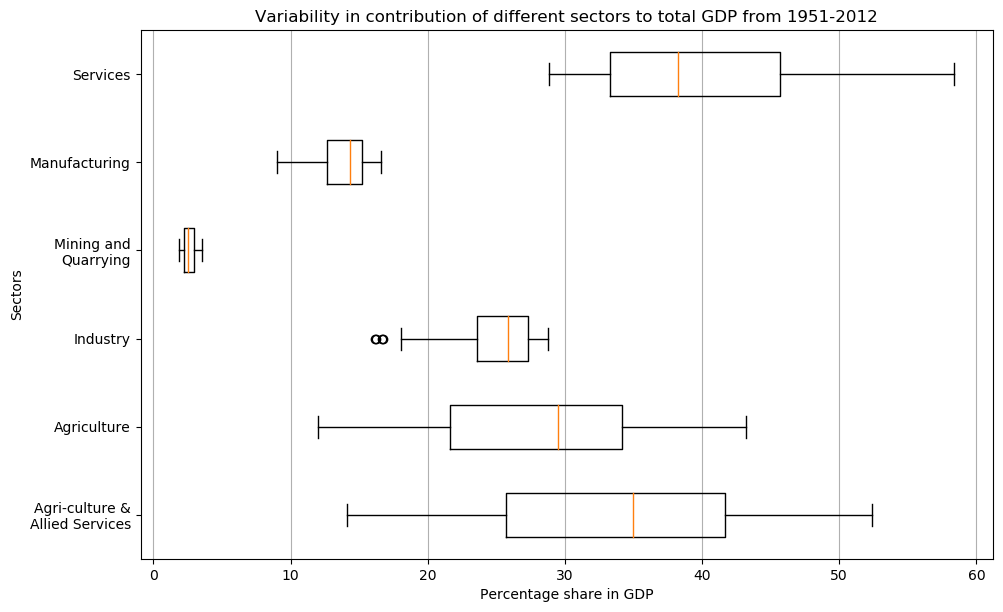

In [11]:
fig2 = plt.figure(3, figsize=(11,7), dpi=100)
ax2 = fig2.add_subplot(111)
ax2.boxplot(gdp_share, labels=wrapped_labels, vert=False)
ax2.xaxis.grid()
ax2.set_xlabel("Percentage share in GDP")
ax2.set_ylabel("Sectors")
ax2.set_title("Variability in contribution of different sectors to total GDP from 1951-2012")
fig2.canvas.draw()
# plt.tight_layout()
fig2.savefig('fig2.png', format='png', dpi=300)

**Observation:** From the plot we observe that the min, max and median values of the service sector is higher than those of any other sector. This shows that service sector on an average has higher contribution to the total GDP. The sectors associated to agriculture also have a substantial contribution towards the GDP but they also have much larger variability. The mining and manufacturing industries consistently have a smaller contribution to the GDP.

In [12]:
fig3 = plt.figure(4, figsize=(10,10), dpi=300)
ax3 = fig3.add_subplot(111)
for col in cols:
    ax3.plot(data2['Financial Year'],data2[col])
ax3.tick_params(axis='x', rotation=90, labelsize=8)
ax3.set_xlabel("Year")
ax3.set_ylabel("Percentage Share in GDP")
ax3.set_title("Trend in contribution of different sectors to total GDP from 1951-2012")
ax3.legend(labels)
fig3.canvas.draw()
fig3.savefig('fig3.png', format='png', dpi=300)

**Observation:** The above line plot shows the trend in contribution of different sectors to the total GDP. This trend is not visible in box plot. From the above plot we see that over the years the contribution of agriculture sectors to GDP has declined while that of service sector has increased. The contribution of mining and quarring has almost remained constant over the years whereas the manufacturing and industrial sectors contibution has grown at a very low rate.